<a href="https://colab.research.google.com/github/Gatiwi93/Pronosticos/blob/main/Capitulo_2/Regresion_Lineal_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Cargar librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

##Cargar los datos

In [2]:
# Cargar el conjunto de datos de California Housing
housing = fetch_california_housing()

##En el conjunto de datos de California Housing, las columnas representan diferentes características relacionadas con las viviendas y su entorno. Aquí está la descripción de cada una de las columnas:
* MedInc: Mediana del ingreso de los hogares en un bloque.
* HouseAge: Mediana de la edad de las casas en un bloque.
* AveRooms: Promedio de habitaciones por vivienda en un bloque.
* AveBedrms: Promedio de dormitorios por vivienda en un bloque.
* Population: Población en un bloque.
* AveOccup: Promedio de ocupación por vivienda en un bloque.
* Latitude: Latitud de la ubicación de la vivienda.
* Longitude: Longitud de la ubicación de la vivienda.


In [3]:
# Crear un DataFrame de pandas con las características y la variable objetivo
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedianaPrecioVivienda'] = housing.target  # Agregar la columna de la variable objetivo
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianaPrecioVivienda
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Se selecciona la variable independiente para el modelo de regresión lineal simple. Esta característica es la mediana del ingreso de los hogares en un bloque (MedInc) para poder predecir el precio mediano de las viviendas en un bloque.

##Seleccionar las variables del modelo de entrenamiento $ \{ \mathbf{x}, \mathbf{y} \} $





In [4]:
# Separar las características (X) y la variable objetivo (y)
X = housing.data[:, [0]]  # seleccionar la primera columna (MedInc) como característica independiente
y = housing.target  # variable objetivo

In [5]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Crear y entrenar el modelo

In [6]:
# Crear un modelo de regresión lineal simple
model = LinearRegression()

In [7]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Realizar predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

In [9]:
# Agregar las predicciones al DataFrame df
df['Predicciones'] = model.predict(housing.data[:, [0]])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianaPrecioVivienda,Predicciones
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,3.935674
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.925694
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.487904
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.810966
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.057457
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1.098891
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1.516762
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,1.157473
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,1.227586


##Se muestra la precisión y el gráfico

In [10]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio: {:.2f}".format(mse))

Error cuadrático medio: 0.71


In [11]:
# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R²): {:.2f}".format(r2))

Coeficiente de determinación (R²): 0.46


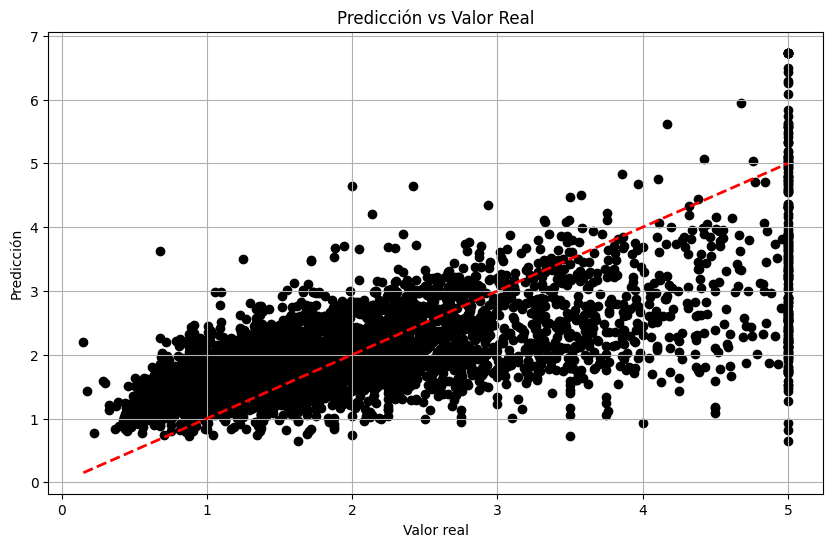

In [12]:
# Graficar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Predicción vs Valor Real')
plt.grid(True)
plt.show()